Регрессия гребня и лассо - это мощные методы, обычно используемые для создания экономных моделей при наличии ‘большого’ количества функций. Здесь ‘большой’ обычно может означать одну из двух вещей:

Достаточно большой, чтобы усилить тенденцию модели к переобучению (всего 10 переменных могут привести к переобучению)
Достаточно большой, чтобы вызвать вычислительные проблемы. В современных системах такая ситуация может возникнуть в случае миллионов или миллиардов функций
Хотя может показаться, что Ridge и Lasso работают над достижением общей цели, присущие им свойства и практические варианты использования существенно различаются. Если вы слышали о них раньше, вы должны знать, что они работают, ограничивая величину коэффициентов признаков наряду с минимизацией ошибки между прогнозируемыми и фактическими наблюдениями. Это называется методами ‘регуляризации’. Ключевое различие заключается в том, как они назначают штрафные коэффициенты:

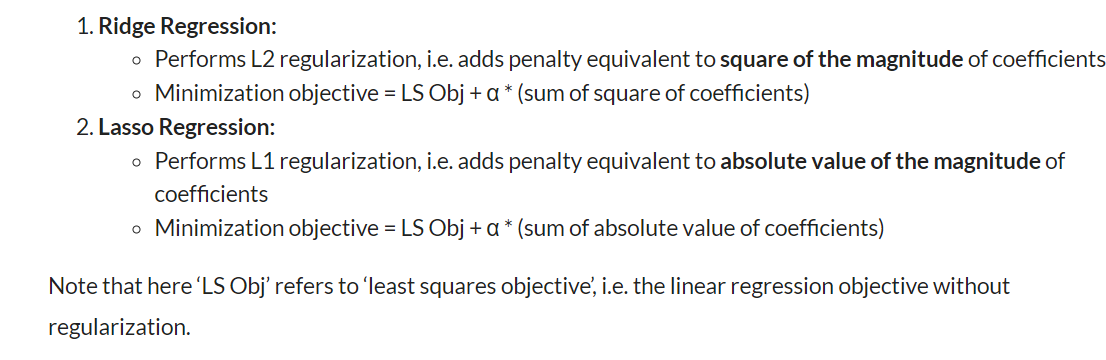

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

## **Оценим синусоидальную функцию, используя полиномиальную регрессию со степенями x от 1 до 15. Добавим столбец для каждой степени до 15 в наш фрейм данных.**
## **Степень 1 - линейная регрессия**

In [ ]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

## **Ridge Regression(L2)**

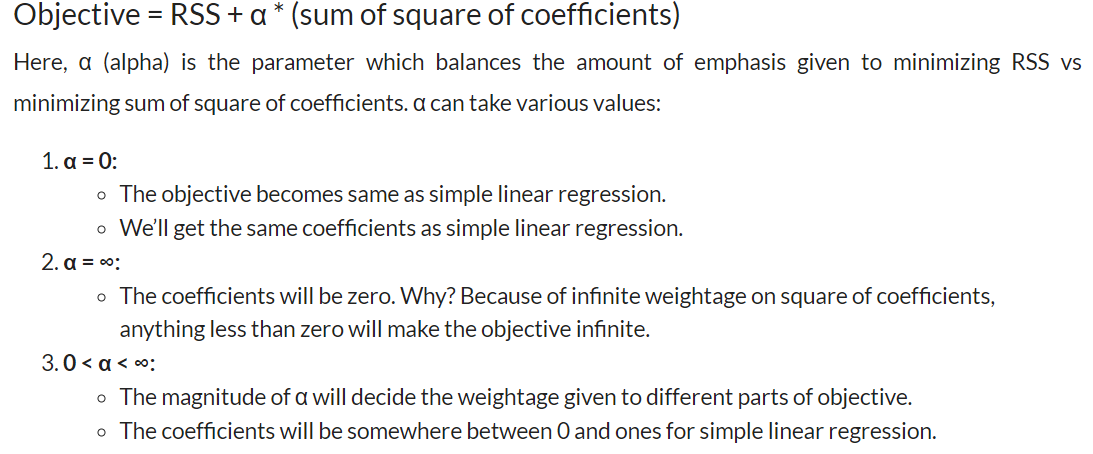

In [ ]:
# L2 для alpha = 0.001
from sklearn.linear_model import Ridge
def ridge_regression(data, power, models_to_plot):
    #Initialize predictors to be set of 15 powers of x
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    #Fit the model
    ridgereg = Ridge(alpha=0.001,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
     
    #Check if a plot is to be made for the entered alpha
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha=0.001 and power: %d'%power)
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:
#Set the different values of alpha to be tested
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
for i in range(1,16):
    coef_matrix_ridge.iloc[i-1,0:i+2] = ridge_regression(data, power=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression_alpha(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression_alpha(data, predictors, alpha_ridge[i], models_to_plot)

## Здесь мы можем ясно видеть, что по мере увеличения значения альфа сложность модели уменьшается. Хотя более высокие значения альфа уменьшают переобучение, значительно более высокие значения также могут привести к недостаточной адаптации (например, альфа = 5). Таким образом, альфа должна быть выбрана с умом. Широко распространенным методом является перекрестная проверка, т.е. значение альфа повторяется по диапазону значений, и выбирается то, которое дает более высокий балл перекрестной проверки.

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

RSS увеличивается с увеличением альфа, сложность этой модели уменьшается
Альфа всего 1e-15 дает нам значительное уменьшение величины коэффициентов. 
Высокие значения альфа могут привести к значительному недообучению. Быстрое увеличение RSS для значений альфа больше 1.
Хотя коэффициенты очень и очень малы, они НЕ равны нулю.

determining the number of zeros in each row of the coefficients data set

In [ ]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

## **Lasso Regression(L1)**

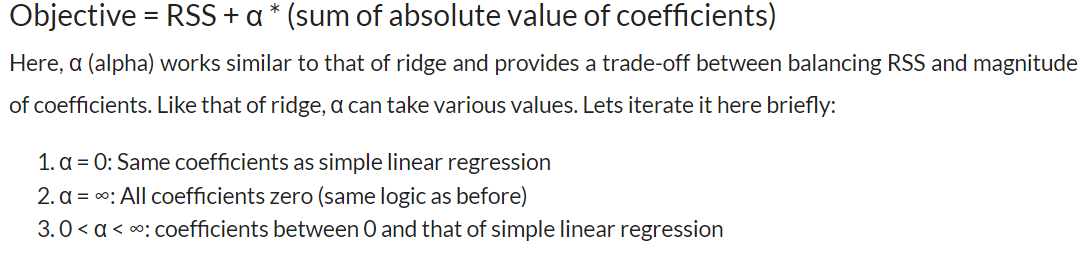

In [ ]:
# L1 для alpha = 1e-4
from sklearn.linear_model import Lasso
def lasso_regression(data, power, models_to_plot):
   #Initialize predictors to be set of 15 powers of x
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    #Fit the model
    lassoreg = Lasso(alpha=1e-4,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha=1e-4 and power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
#Set the different values of alpha to be tested
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
for i in range(1,16):
    coef_matrix_lasso.iloc[i-1,0:i+2] = lasso_regression(data, power=i, models_to_plot=models_to_plot)


In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

In [ ]:

from sklearn.linear_model import Lasso
def lasso_regression_alpha(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression_alpha(data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

Помимо ожидаемого вывода о более высоком RSS для более высоких альф, мы можем видеть следующее:

Для тех же значений альфа коэффициенты лассо-регрессии намного меньше, чем коэффициенты гребневой регрессии .

Для той же альфы лассо имеет более высокий RSS (более плохое соответствие) по сравнению с гребневой регрессией.

Многие коэффициенты равны нулю даже при очень малых значениях альфа.

Реальное отличие от ridge проявляется в последнем выводе.Проверим количество коэффициентов, которые равны нулю в каждой модели:

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

Мы можем заметить, что даже при небольшом значении альфа значительное количество коэффициентов равно нулю. Это также объясняет горизонтальную линию, подходящую для альфа = 1 на графиках лассо, это просто базовая модель. Это явление, когда большинство коэффициентов равны нулю, называется «разреженностью». Хотя лассо выполняет выбор признаков, этот уровень разреженности достигается только в особых случаях